In [21]:
#imports
#load in standard data 
#load in models

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
import pandas as pd
import sklearn
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier

pd.set_option('display.max_columns', 500)
import pickle as pkl
vtc1 = pkl.load(open('vtc.pkl','rb'))
vtc2 = pkl.load(open('vtcpoly.pkl','rb'))
df1 = pd.read_csv('prepeddata.csv',index_col='Unnamed: 0')
df1['stimulant'] = df1['stimulant'].apply(lambda x: 'low' if x <= 2 else 'high')


stimtestdata = df1.drop(['hallucinagen','depressant'],axis = 1)
stimx = df1.drop('stimulant',axis = 1)
stimy = df1.stimulant



poly=PolynomialFeatures(degree=3,interaction_only=True)
scaler = StandardScaler()
polyscaler = StandardScaler()
selector = SelectKBest(k=43)

In [22]:
#traintest split default data 
stimXtrain,stimXtest,stimYtrain,stimYtest = train_test_split(stimx,stimy)
sm = SMOTE()
tl = TomekLinks()
sampling = SMOTETomek( random_state=None, smote=sm, tomek=tl, n_jobs=1)


stimXtrain, stimYtrain = sampling.fit_resample(stimXtrain, stimYtrain)

In [23]:
#fit std scaler to default data?

In [24]:
#make a pipeline of standard vtc
stdvtc = Pipeline([('scaler',scaler),('model', vtc1)])
stdvtc.fit(stimXtrain,stimYtrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('model1',
                                               LogisticRegression(C=0.1,
                                                                  class_weight='auto',
                                                                  max_iter=1000,
                                                                  solver='sag',
                                                                  warm_start=True)),
                                              ('model2',
                                               LogisticRegression(C=1,
                                                                  class_weight='auto',
                                                                  max_iter=1000,
                                                                  penalty='l1',
                                                                  solver='saga',
        

In [25]:
#instantiate d3 interaction only polyfeats

In [26]:
#instantiate select k best k =43

In [27]:
#instantiate standardscaler

In [28]:
#make a pipeline of poly vtc in order
# polyfeats
#select k best
#standardscaler
polyvtc = Pipeline([('poly',poly),('selector', selector),('scaler',polyscaler),('model', vtc2)])
polyvtc.fit(stimXtrain,stimYtrain)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(steps=[('poly', PolynomialFeatures(degree=3, interaction_only=True)),
                ('selector', SelectKBest(k=43)), ('scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('polymodel1',
                                               LogisticRegression(C=0.5333333333333333,
                                                                  class_weight='auto',
                                                                  max_iter=1000,
                                                                  solver='sag',
                                                                  warm_start=True)),
                                              ('polymodel2',
                                               LogisticRegression(C=1,
                                                                  class_weight='auto',
                                                                  f...
                                            

In [29]:
# fit both

In [30]:
#check classification report for both
vtcypred = stdvtc.predict(stimXtest)
vtcytrain = stdvtc.predict(stimXtrain)

print(f1_score(vtcytrain,stimYtrain,average='weighted'),f1_score(stimYtest,vtcypred,average='weighted'))
print(classification_report(stimYtrain, vtcytrain))
print(classification_report(stimYtest, vtcypred))



confusion_matrix(stimYtrain, vtcytrain)

0.9566156601855197 0.8480584356510176
              precision    recall  f1-score   support

        high       0.93      0.99      0.96      1221
         low       0.99      0.93      0.96      1220

    accuracy                           0.96      2441
   macro avg       0.96      0.96      0.96      2441
weighted avg       0.96      0.96      0.96      2441

              precision    recall  f1-score   support

        high       0.44      0.67      0.53        66
         low       0.94      0.86      0.90       406

    accuracy                           0.83       472
   macro avg       0.69      0.76      0.71       472
weighted avg       0.87      0.83      0.85       472



array([[1205,   16],
       [  90, 1130]])

In [31]:
confusion_matrix(stimYtest,vtcypred)

array([[ 44,  22],
       [ 56, 350]])

In [32]:
#check classification report for both
vtcypred = polyvtc.predict(stimXtest)
vtcytrain = polyvtc.predict(stimXtrain)

print(f1_score(vtcytrain,stimYtrain,average='weighted'),f1_score(stimYtest,vtcypred,average='weighted'))
print(classification_report(stimYtrain, vtcytrain))
print(classification_report(stimYtest, vtcypred))



confusion_matrix(stimYtrain, vtcytrain)

0.9512804510846191 0.8578662132724085
              precision    recall  f1-score   support

        high       0.93      0.98      0.95      1221
         low       0.97      0.93      0.95      1220

    accuracy                           0.95      2441
   macro avg       0.95      0.95      0.95      2441
weighted avg       0.95      0.95      0.95      2441

              precision    recall  f1-score   support

        high       0.46      0.76      0.57        66
         low       0.96      0.86      0.90       406

    accuracy                           0.84       472
   macro avg       0.71      0.81      0.74       472
weighted avg       0.89      0.84      0.86       472



array([[1192,   29],
       [  90, 1130]])

In [33]:
confusion_matrix(stimYtest,vtcypred)

array([[ 50,  16],
       [ 58, 348]])

In [34]:
pkl.dump(stdvtc,open('finalstdvtc.pkl','wb'))
pkl.dump(polyvtc,open('finalpolyvtc.pkl','wb'))

In [35]:
adaboostvtc = pkl.load(open('adaoverallvtc.pkl','rb'))
adaboostvtc.fit(stimXtrain,stimYtrain)
vtcypred = adaboostvtc.predict(stimXtest)
vtcytrain = adaboostvtc.predict(stimXtrain)

print(f1_score(vtcytrain,stimYtrain,average='weighted'),f1_score(stimYtest,vtcypred,average='weighted'))
print(classification_report(stimYtrain, vtcytrain))
print(classification_report(stimYtest, vtcypred))



confusion_matrix(stimYtrain, vtcytrain)

0.9367095003240954 0.84801006963889
              precision    recall  f1-score   support

        high       0.89      0.99      0.94      1221
         low       0.99      0.88      0.93      1220

    accuracy                           0.94      2441
   macro avg       0.94      0.94      0.94      2441
weighted avg       0.94      0.94      0.94      2441

              precision    recall  f1-score   support

        high       0.44      0.71      0.54        66
         low       0.95      0.85      0.90       406

    accuracy                           0.83       472
   macro avg       0.69      0.78      0.72       472
weighted avg       0.88      0.83      0.85       472



array([[1213,    8],
       [ 147, 1073]])

In [36]:
finalvtc =VotingClassifier([('ada',adaboostvtc),('stdmodel',stdvtc),('polymodel',polyvtc)]
                           ,voting='hard',verbose = True,n_jobs=-1)
finalvtc.fit(stimXtrain,stimYtrain)




VotingClassifier(estimators=[('ada',
                              VotingClassifier(estimators=[('mod1',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('model',
                                                                             AdaBoostClassifier(base_estimator=LogisticRegression(C=1,
                                                                                                                                  class_weight='auto',
                                                                                                                                  max_iter=1000,
                                                                                                                                  solver='sag',
                                                   

In [37]:
vtcypred = finalvtc.predict(stimXtest)
vtcytrain = finalvtc.predict(stimXtrain)

print(f1_score(vtcytrain,stimYtrain,average='weighted'),f1_score(stimYtest,vtcypred,average='weighted'))
print(classification_report(stimYtrain, vtcytrain))
print(classification_report(stimYtest, vtcypred))



confusion_matrix(stimYtrain, vtcytrain)

0.9537617278606553 0.8561809462935733
              precision    recall  f1-score   support

        high       0.92      0.99      0.96      1221
         low       0.99      0.92      0.95      1220

    accuracy                           0.95      2441
   macro avg       0.96      0.95      0.95      2441
weighted avg       0.96      0.95      0.95      2441

              precision    recall  f1-score   support

        high       0.46      0.76      0.57        66
         low       0.96      0.85      0.90       406

    accuracy                           0.84       472
   macro avg       0.71      0.81      0.74       472
weighted avg       0.89      0.84      0.86       472



array([[1206,   15],
       [  98, 1122]])

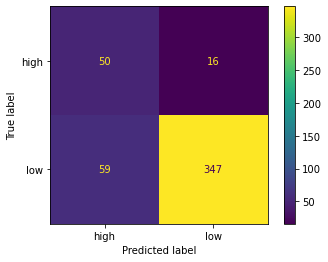

In [40]:
plot_confusion_matrix(finalvtc,stimXtest, stimYtest)

In [ ]:
pkl.dump(finalvtc,open('finaloverallvtc.pkl','wb'))